# 1) NGD CALCULATION

In [2]:
import pandas as pd
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [3]:
data=pd.read_csv('combined.csv')
data.head(5)

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62


In [4]:
def hitcount(term):
    url="https://www.google.com/search?q="+term
    r  = requests.get(url)
    print(r.url)
    if(r.status_code!=200):
        return False,"Error code "+str(r.status_code)
    else:
        soup=BeautifulSoup(r.content, 'html.parser')
        temp=soup.find_all(id="resultStats")[0].get_text().split(" ")
        return True,float(temp[1].replace(',',''))

In [5]:
_,total=hitcount('the')   
print(total)

https://www.google.com/search?q=the
25270000000.0


In [5]:
def cal_ngd(w1,w2):
    ok,x1=hitcount(w1)
    if(not ok):return x1
    ok,y1=hitcount(w2)
    if(not ok):return x1
    combinequery=w1 +" "+ w2
    ok,xy=hitcount(combinequery)
    N=total*1000
    return (max(math.log10(x1),math.log10(y1))-math.log10(xy))/(math.log10(N)-min(math.log10(x1),math.log10(y1)))

In [ ]:
###########################################now calculation#################################################

In [6]:
#we have precalculated ngd and save them in csv file (u can skip this cell) and load frommcsv file
# this will take approximately 30 minutes
from IPython.display import clear_output
sim=np.zeros(len(data))
temp=list()
for i in range(len(data)):
    print("Remaining:",len(data)-i-1)
    w1=str(data.iloc[i][0])
    w2=str(data.iloc[i][1])
    score=cal_ngd(w1,w2)
    temp.append([w1,w2,score])
    print(w1,w2,score)
    sim[i]=score
    time.sleep(2)
    clear_output()
score=sim

# 2) PLOT

In [ ]:
#########used to save in csv

In [7]:
# samplengd=pd.DataFrame(temp,columns=['w1','w2','score'])
# samplengd.to_csv('samplengd.csv',index=False)
# samplengd.head(5)

,w1,w2,score
0,love,sex,0.136814
1,tiger,cat,0.230490
2,tiger,tiger,0.033864
3,book,paper,0.184762
4,computer,keyboard,0.185553


In [ ]:
#We have precalculated ngd and save them  


# load from precalculated uncomment lines below to load from csv

In [8]:
# samplengd=pd.read_csv('samplengd.csv')
# samplengd.head(5)
# score=samplengd['score'][:len(samplengd)] 

#### Here we are converting NGD into similarity

In [9]:
score=1/np.exp(score)
score=(score-np.min(score))*10/(np.max(score)-np.min(score))

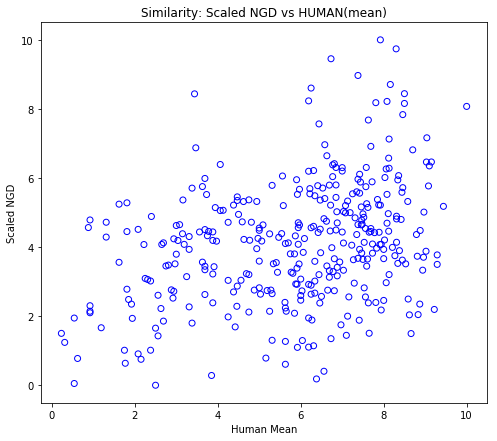

In [10]:
fig,ax=plt.subplots(figsize=(8,7))
ax.scatter(data['Human (mean)'][:len(data)],score,facecolors='none',edgecolor='b')
ax.set_ylabel("Scaled NGD")
ax.set_xlabel("Human Mean")
ax.set_title('Similarity: Scaled NGD vs HUMAN(mean)')
# ax.plot(np.linspace(0,10),np.linspace(0,10),color='green',linestyle='--')
plt.savefig("ScaledNgd.png",bbox='tight')
plt.show()